In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22f25c8e090>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
my_last_date = session.query(Measurement.date).order_by((Measurement.date).desc()).first().date
my_last_date

'2017-08-23'

### The most recent observation in the dataset was taken on 2017-08-23

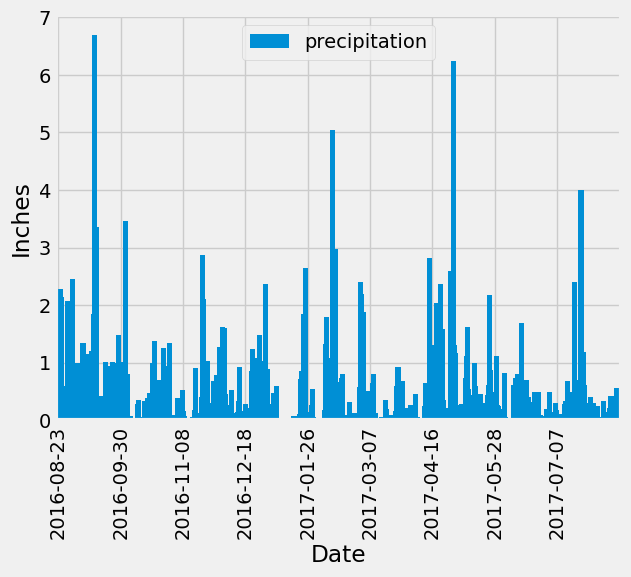

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
my_last_date = session.query(Measurement.date).order_by((Measurement.date).desc()).first().date

# Perform a query to retrieve the data and precipitation scores
my_data = session.query(Measurement.date, Measurement.prcp)\
                       .filter(Measurement.date >= '2016-08-23')
# Save the query results as a Pandas DataFrame. Explicitly set the column names
my_data_df = pd.DataFrame(my_data, columns=['Date', 'precipitation'])
# myData_df.sort()
my_data_df.set_index('Date', inplace=True) 
# myData_df.dropna(inplace=True)

# Sort the dataframe by date
my_data_df.sort_values('Date', ascending=True, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
# myTicks = ['2016-08-23', '2016-10-01', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
# myData_df.plot(kind='bar', figsize=(6.5,5), ylabel='Inches', width=20, xticks=myTicks)
my_data_df.plot(kind='bar', figsize=(6.5,5), ylabel='Inches', width=20)
plt.tick_params(axis='x', which='minor', rotation=90, )

# plt.set_xticks=myTicks
plt.locator_params(axis='x', nbins=9)
plt.legend(loc='upper center')
plt.tight_layout
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
my_data_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
station_row = session.query(Measurement).first()
station_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22f28cc1a90>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08}

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

### Total number of stations in the data set is 9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, Station.name, func.count(Measurement.station))\
.filter(Station.station==Measurement.station)\
.group_by(Measurement.station)\
.order_by((func.count(Measurement.station)).desc()).all()


[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

### The Station with the most observations is USC00519281 located at Waihee

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), \
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()


(54.0, 85.0, 71.66378066378067)

In [18]:
#finding most recent observation from station USC00519281
session.query(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.station =='USC00519281').first()

('2017-08-18',)

### The most recent observation for station USC00519281 was taken on 2017-08-18

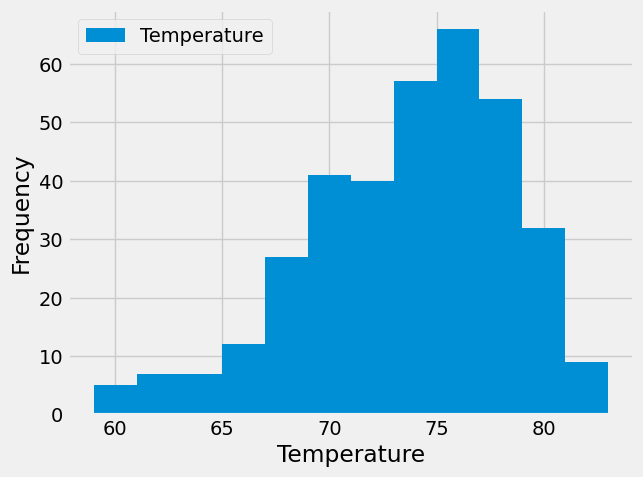

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  357 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

my_data = session.query(Measurement.tobs)\
                       .filter(Measurement.date >= '2016-08-18')\
                       .filter(Measurement.station =='USC00519281')\
                       .order_by(Measurement.date)
my_data2_df = pd.DataFrame(my_data, columns=['Temperature'])
my_data2_df.plot(kind='hist', figsize=(6.5,5), xlabel='Temperature', bins=12)
plt.show()
my_data2_df.info()

# Close Session

In [20]:
# Close Session
session.close()